In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [282]:
df = pd.read_csv(r"C:\PRGM\luminar\machine learning\DataSet\titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [283]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

df.shape
# df.info()
df.describe()

df.duplicated().sum()
df.dropna(subset=["Embarked"],inplace=True)

df.head()
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Survived      0
dtype: int64

In [284]:
df.groupby("Pclass")["Age"].mean()

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [285]:
def set_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

df['Age'] = df[['Age','Pclass']].apply(set_age,axis=1)

C:\Users\vaisa\AppData\Local\Temp\ipykernel_21756\4218180141.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\vaisa\AppData\Local\Temp\ipykernel_21756\4218180141.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [286]:
df.dropna(inplace=True)
df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [287]:
for i in df:
  if i == "Name":
    continue
  print(df[i].value_counts())
  print()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Sex
male      577
female    312
Name: count, dtype: int64

Age
25.00    159
38.00     40
29.00     31
24.00     30
22.00     27
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 247, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Survived
0    549
1    340
Name: count, dtype: int64



In [288]:
df.groupby(["Embarked","Pclass"])["Pclass"].count()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Pclass, dtype: int64

In [289]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.206040,0.524184,0.382452,32.096681,0.382452
std,0.834700,13.177747,1.103705,0.806761,49.697504,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


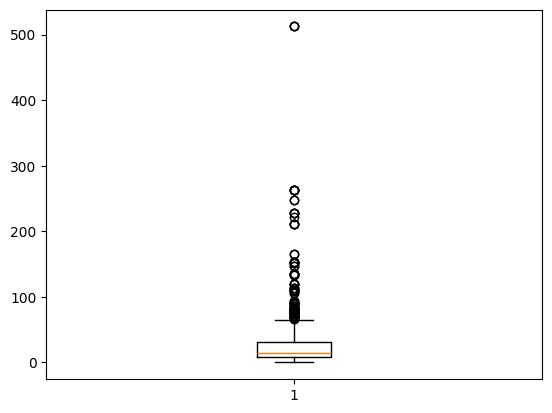

In [290]:
df.groupby("Pclass")["Fare"].mean()
# df["Fare"].unique()
plt.boxplot(df["Fare"])
plt.show()

df = df[df["Fare"]<=300]

In [291]:
df[df["Survived"]==1].groupby("Sex")["Survived"].count()

Sex
female    230
male      107
Name: Survived, dtype: int64

In [292]:
# df[df["Survived"]==1].groupby("Age")["Survived"].count()

# round(df["Age"]).value_counts()

In [293]:
# df["Age Catgegory"] = pd.cut(df["Age"],[0,18,35,50,90],labels=["Child","Young","Adults","Seniors"])

In [294]:
df[df["Survived"]==0].groupby("Sex")["Survived"].count()

Sex
female     81
male      468
Name: Survived, dtype: int64

In [295]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [296]:
ohe_embarked = OneHotEncoder(drop="first",sparse_output=False)
arr = ohe_embarked.fit_transform(df[["Embarked"]])
df_arr1 = pd.DataFrame(arr,columns=ohe_embarked.get_feature_names_out())
df = df.join(df_arr1)

In [297]:
ohe_sex = OneHotEncoder(drop="first",sparse_output=False)
arr = ohe_sex.fit_transform(df[["Sex"]])
df_arr2 = pd.DataFrame(arr,columns=ohe_sex.get_feature_names_out())
df.reset_index(drop=True,inplace=True)
df = df.join(df_arr2)

In [298]:
df.drop(columns=["Sex","Embarked"],inplace=True)
df.dropna(inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,7.2500,0,0.0,1.0,1.0
1,1,38.0,1,0,71.2833,1,0.0,0.0,0.0
2,3,26.0,0,0,7.9250,1,0.0,1.0,0.0
3,1,35.0,1,0,53.1000,1,0.0,1.0,0.0
4,3,35.0,0,0,8.0500,0,0.0,1.0,1.0


In [299]:
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [300]:
mmx = MinMaxScaler()
x_scaled = mmx.fit_transform(x)

In [301]:
x_test,x_train,y_test,y_train = train_test_split(x_scaled,y,test_size=0.3,random_state=3)

In [302]:
models = [KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier()]

for i in models:
  print(i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(cross_val_score(i,x_train,y_train,cv=5).mean())
  print()
  print()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       389
           1       0.69      0.71      0.70       227

    accuracy                           0.77       616
   macro avg       0.76      0.76      0.76       616
weighted avg       0.77      0.77      0.77       616

0.739622641509434


SVC()
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       389
           1       0.76      0.66      0.71       227

    accuracy                           0.80       616
   macro avg       0.79      0.77      0.78       616
weighted avg       0.80      0.80      0.80       616

0.7735849056603774


GaussianNB()
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       389
           1       0.65      0.72      0.68       227

    accuracy                           0.76       616
   macro avg       0.74      0.75      0.74  

In [303]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [304]:
import pickle

dit = {"model":model,"scaler":mmx,"oh_embarked":ohe_embarked,"oh_gender":ohe_sex}

with open("Titanic.pkl","wb") as f:
    pickle.dump(dit,f)